**Dataset description**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1mp_uP_G2rXCTGqZwHWcFF1CaLb129TGK')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
for col in df.select_dtypes(include=['object', 'category','float']):
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [ ]:
counts = df['Churn'].value_counts()
percentages = df['Churn'].value_counts(normalize=True) * 100

table = pd.DataFrame({'Count': counts,'Percentage (%)': percentages.round(2)})
table

,Count,Percentage (%)
Churn,,
No,5174,73.46
Yes,1869,26.54


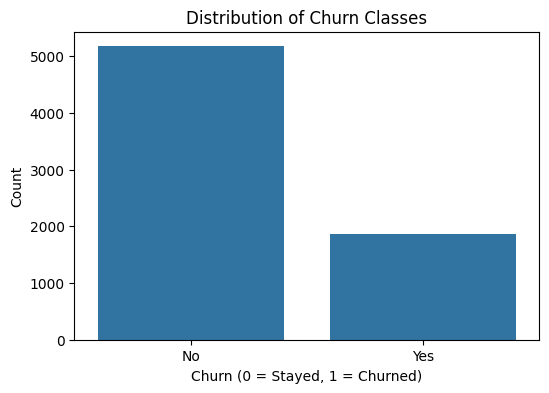

,count
Churn,
No,5174
Yes,1869


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churn Classes')
plt.xlabel('Churn (0 = Stayed, 1 = Churned)')
plt.ylabel('Count')
plt.show()
churn_counts

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

EDA

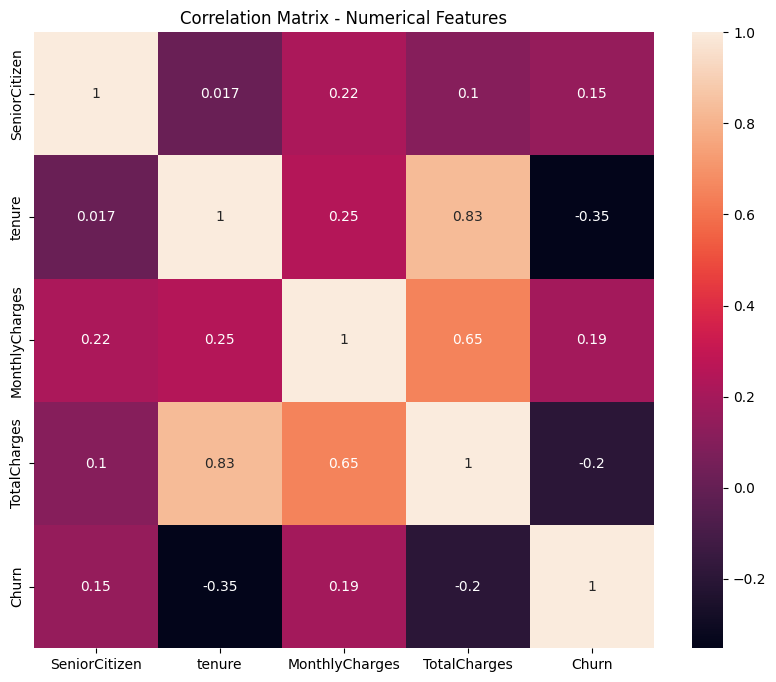

In [ ]:
corr_mat = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix - Numerical Features')
plt.show()

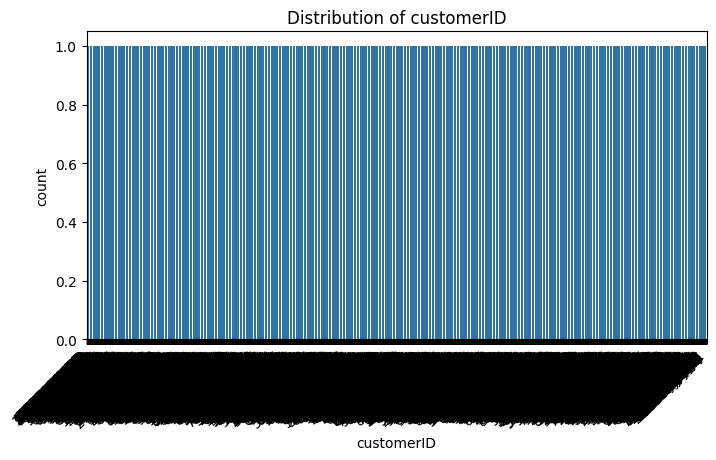

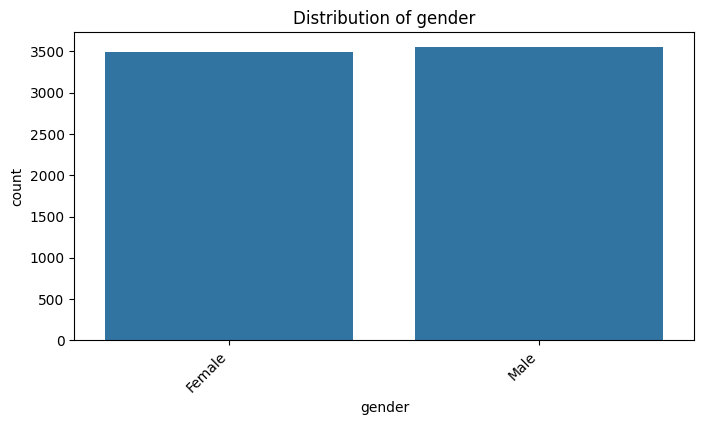

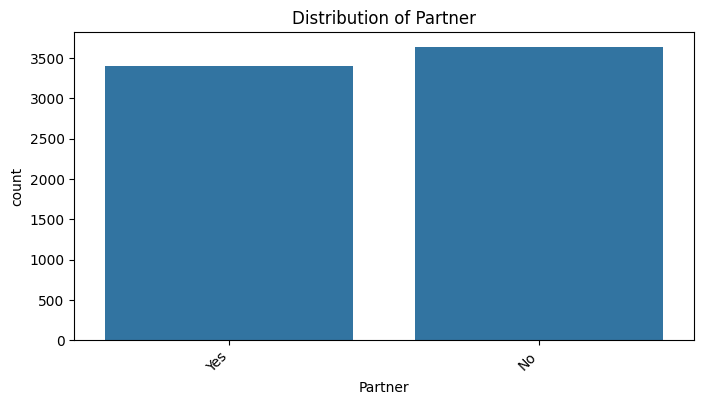

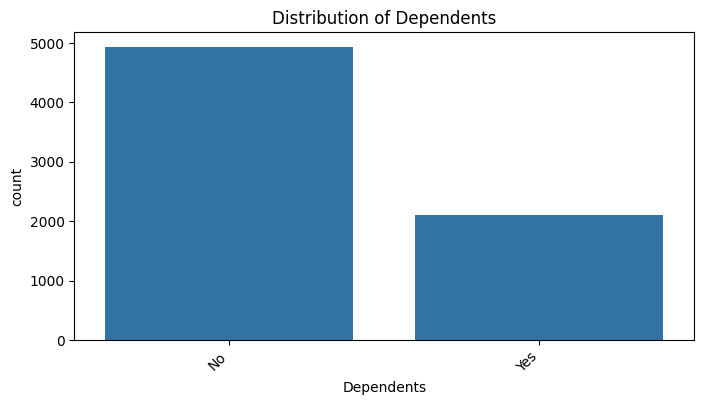

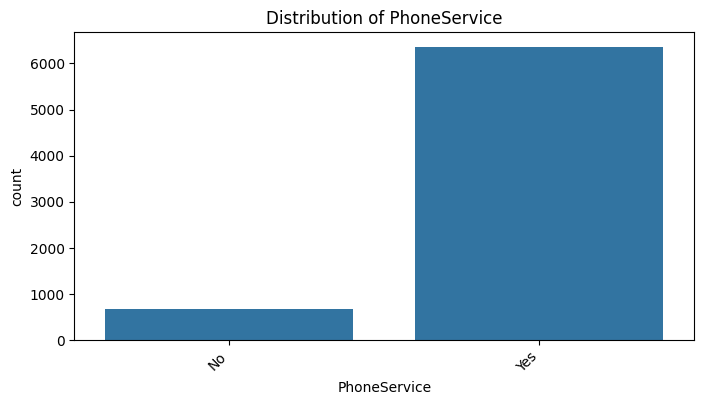

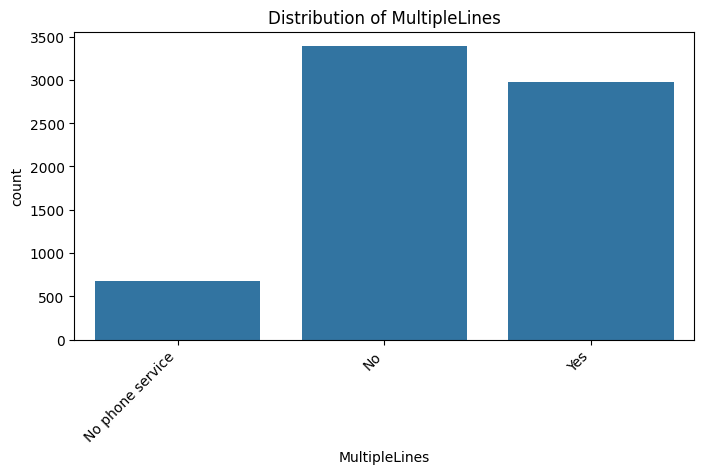

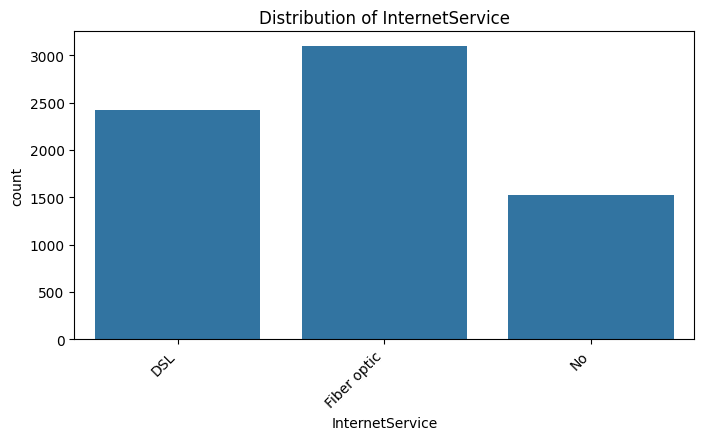

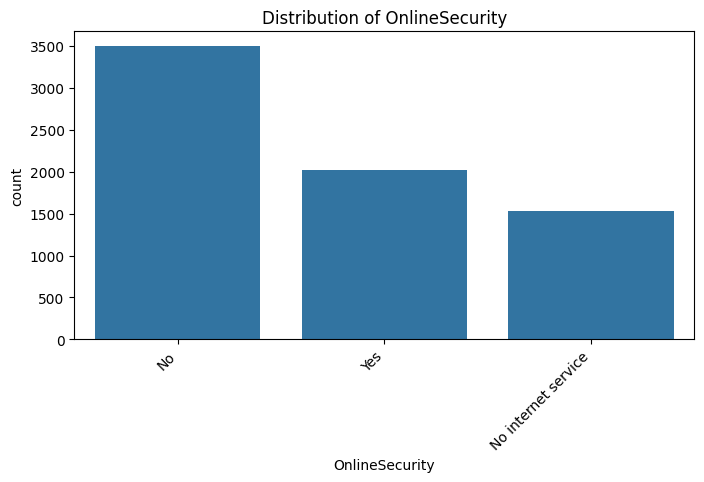

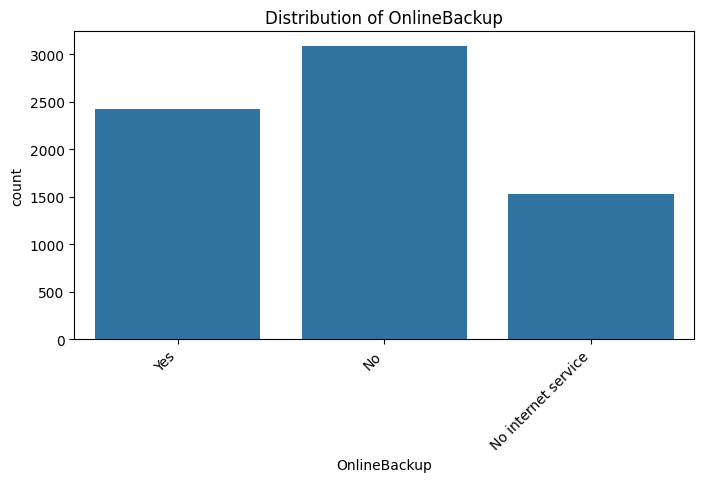

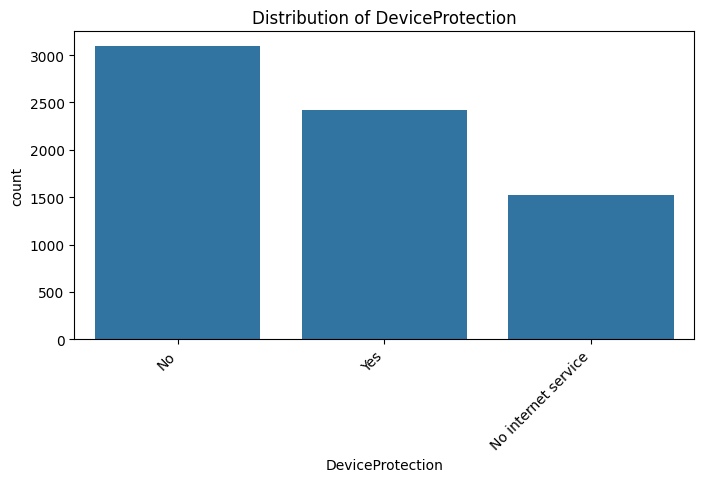

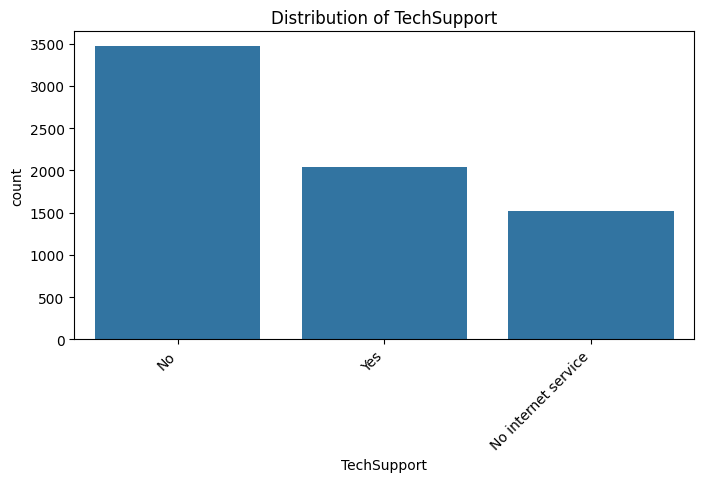

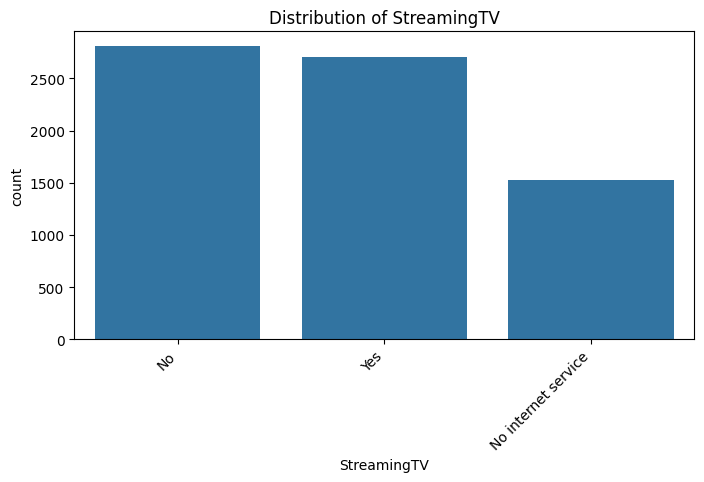

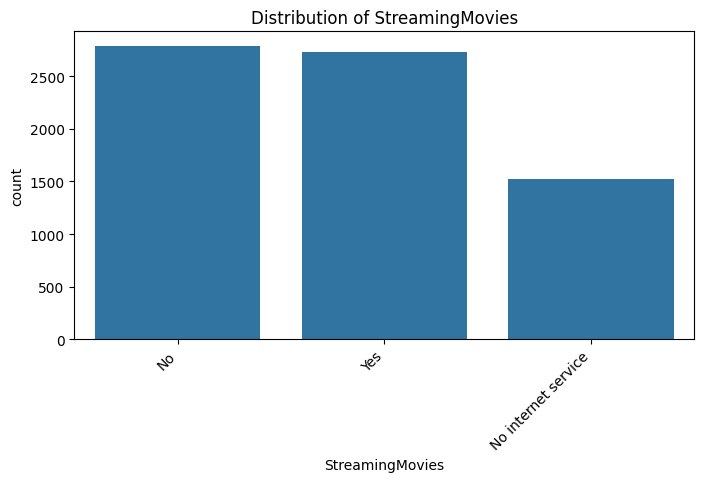

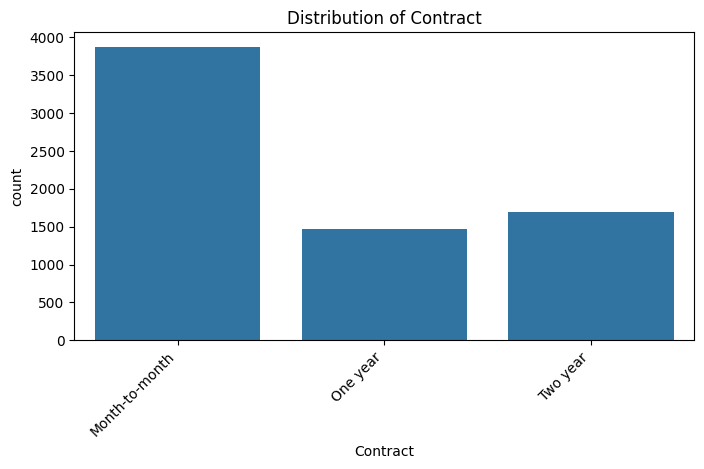

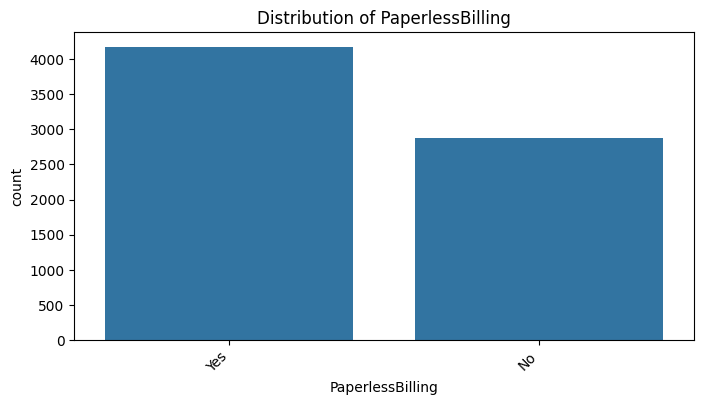

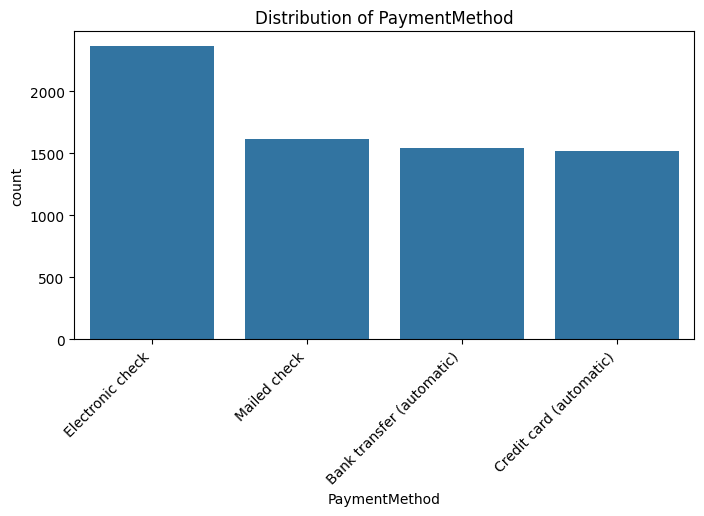

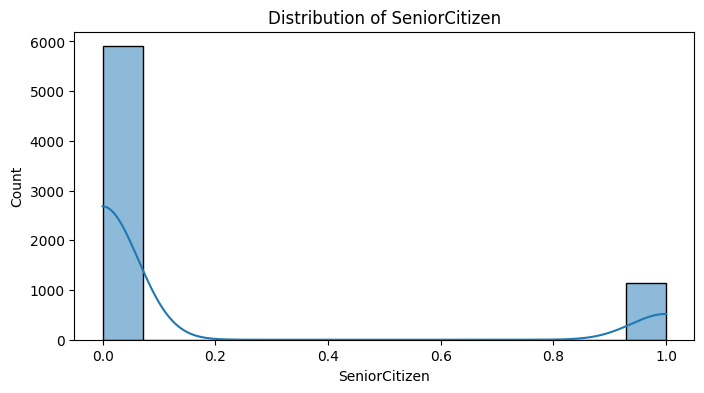

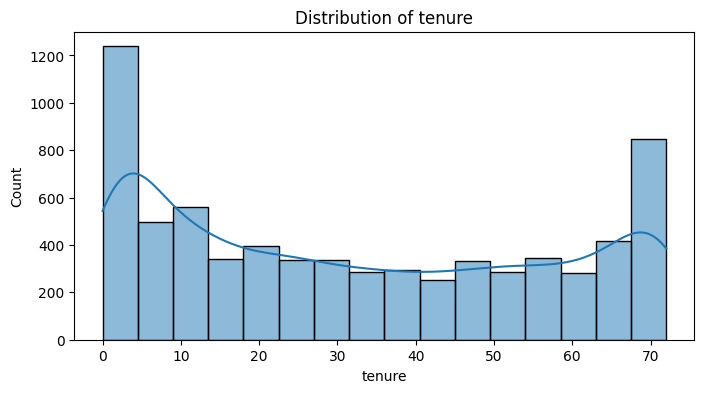

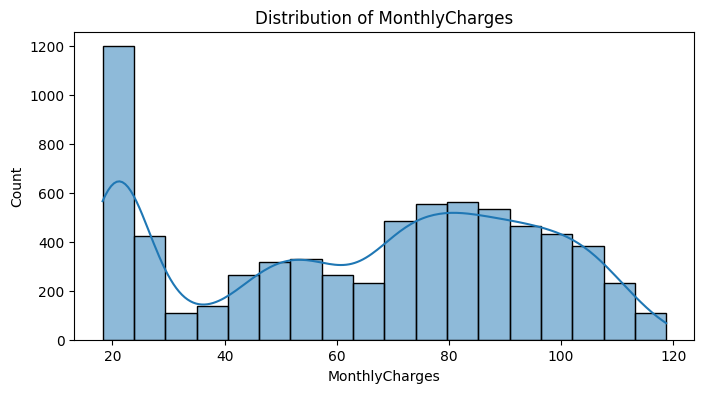

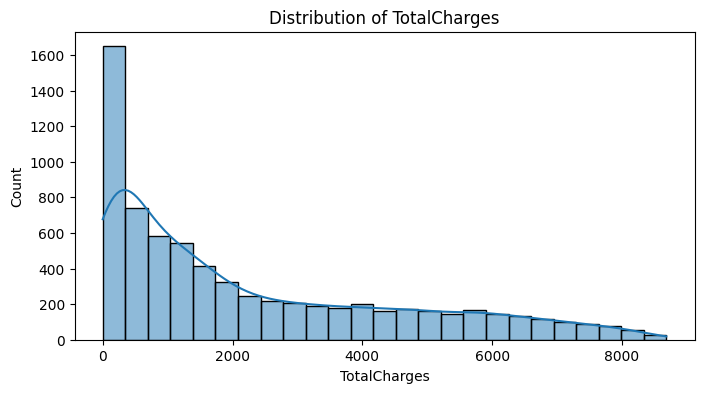

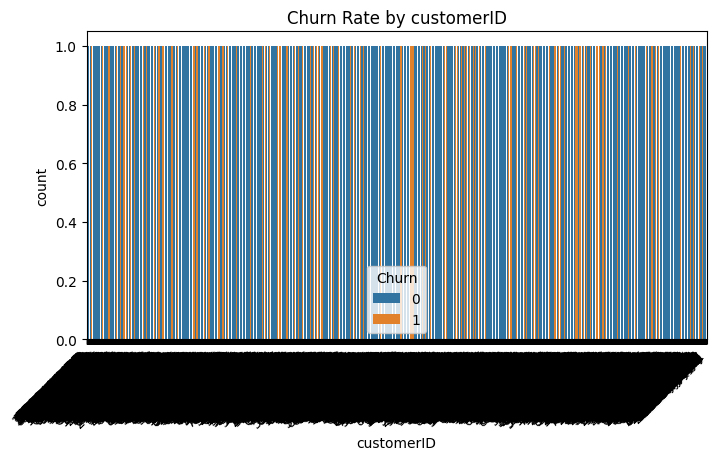

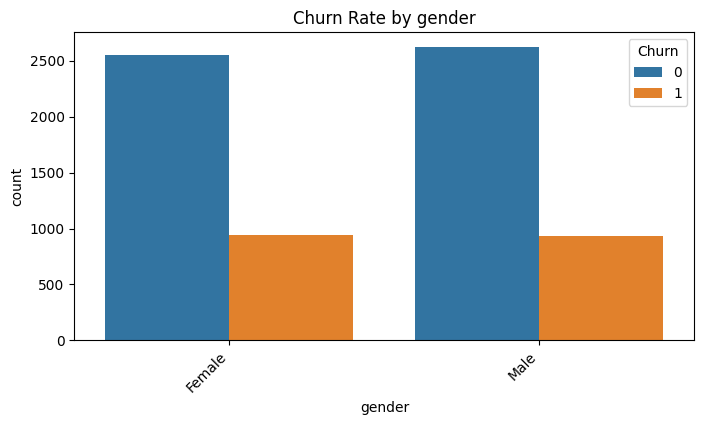

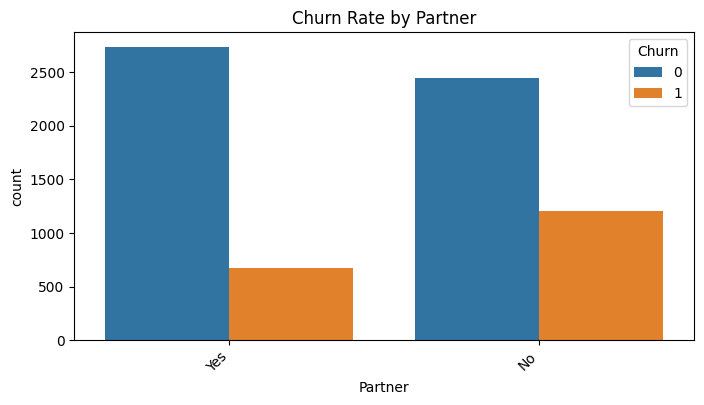

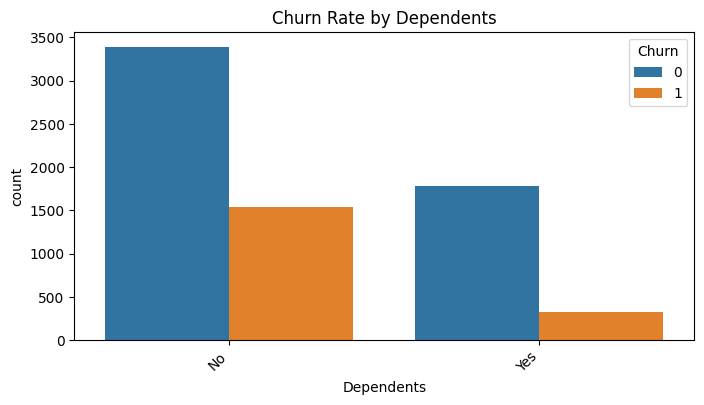

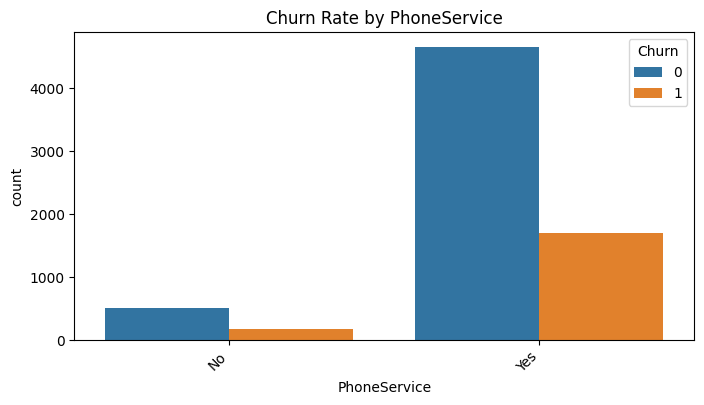

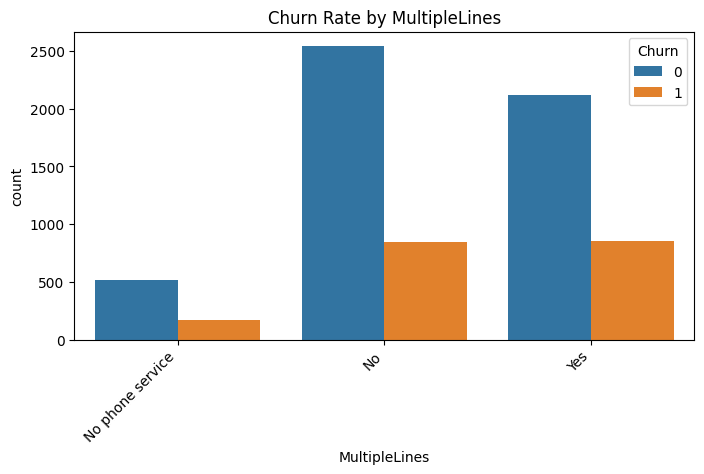

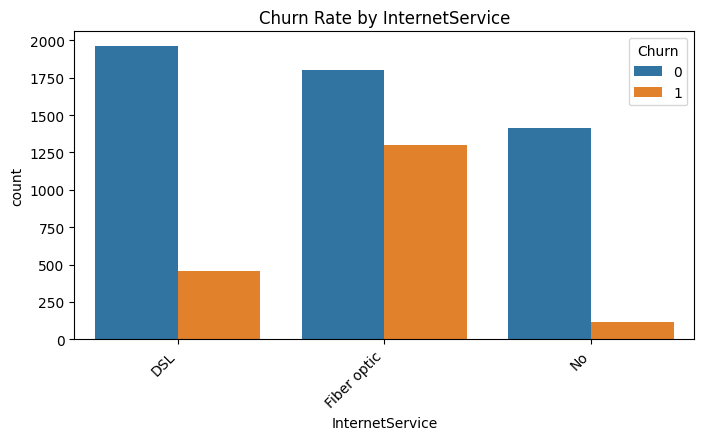

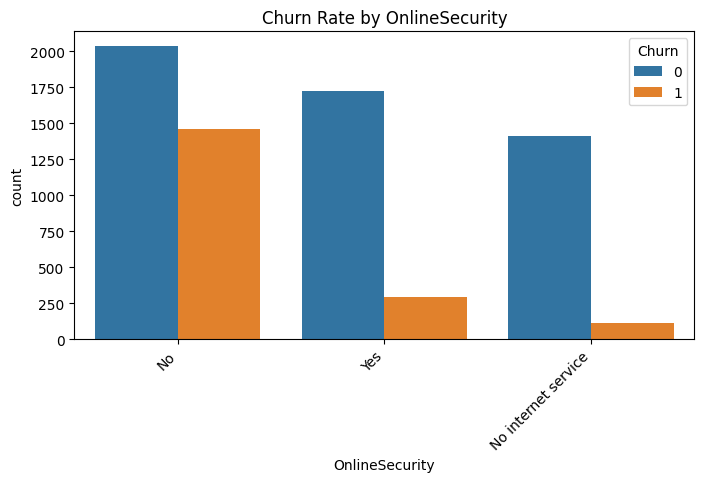

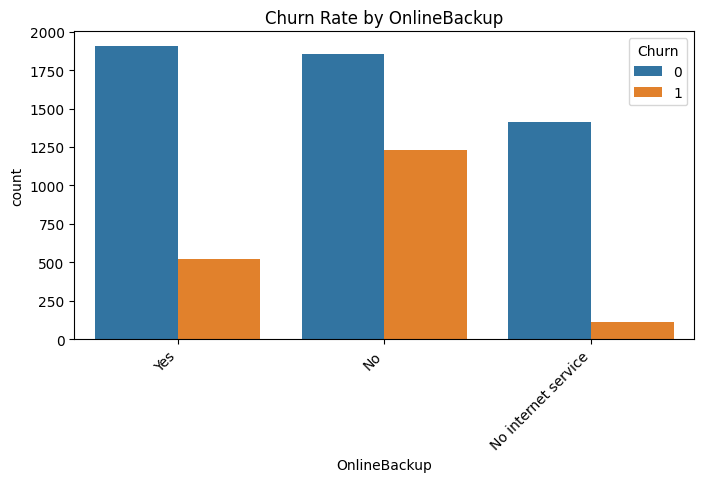

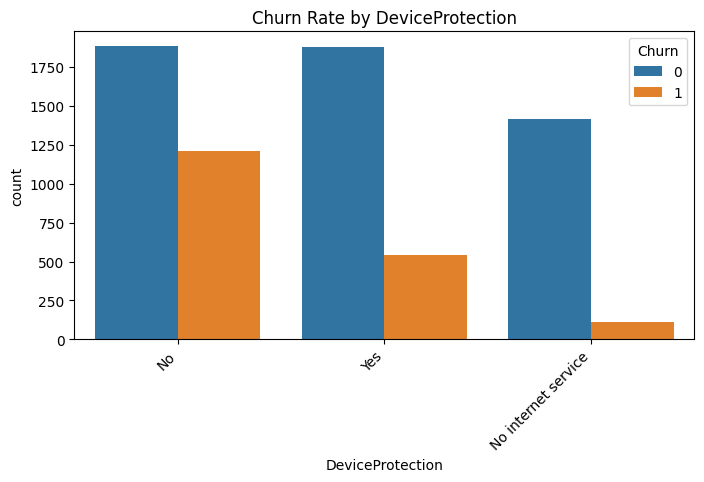

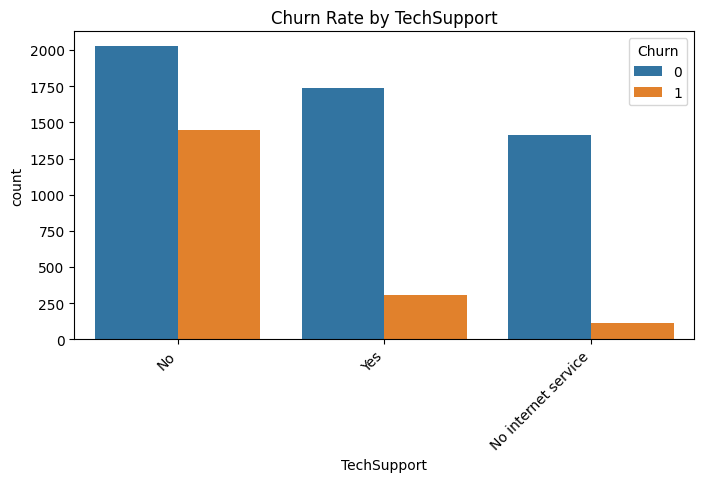

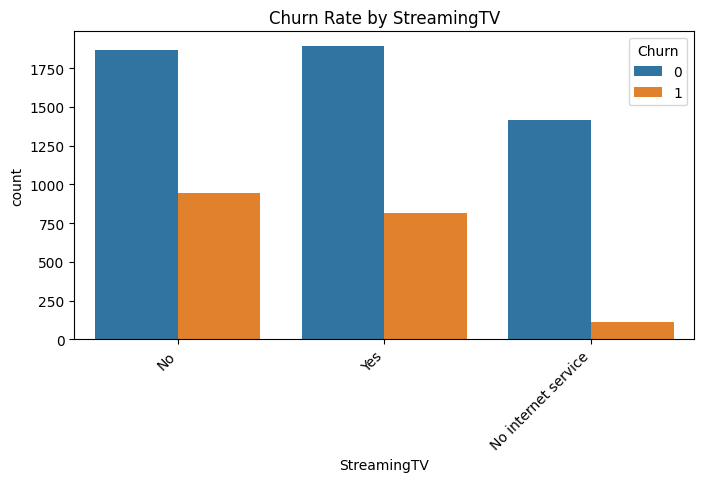

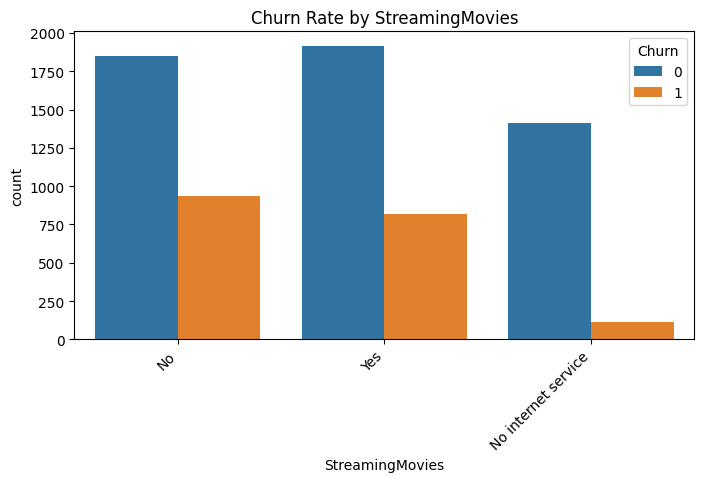

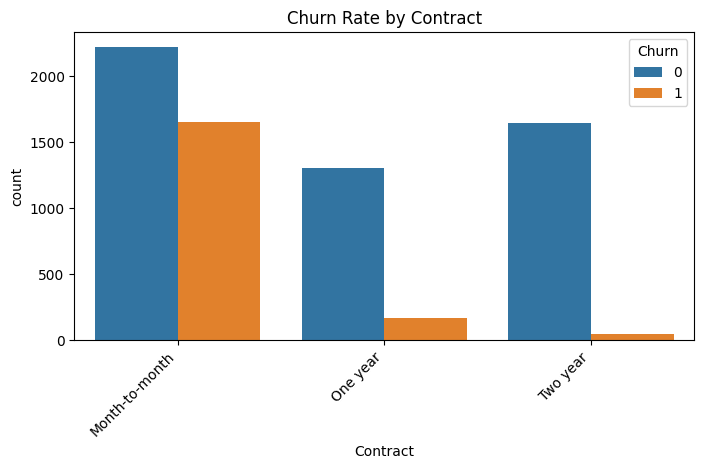

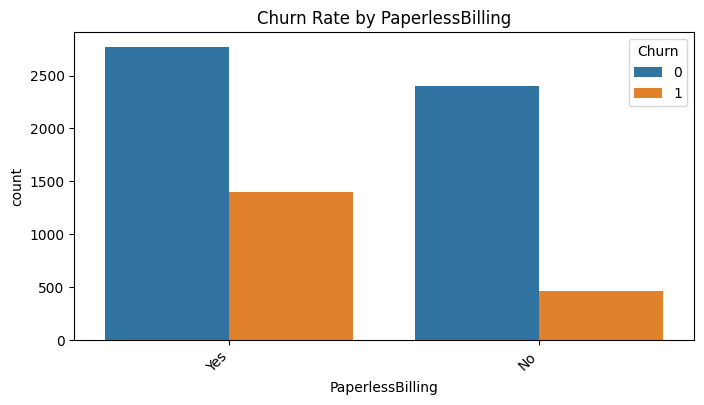

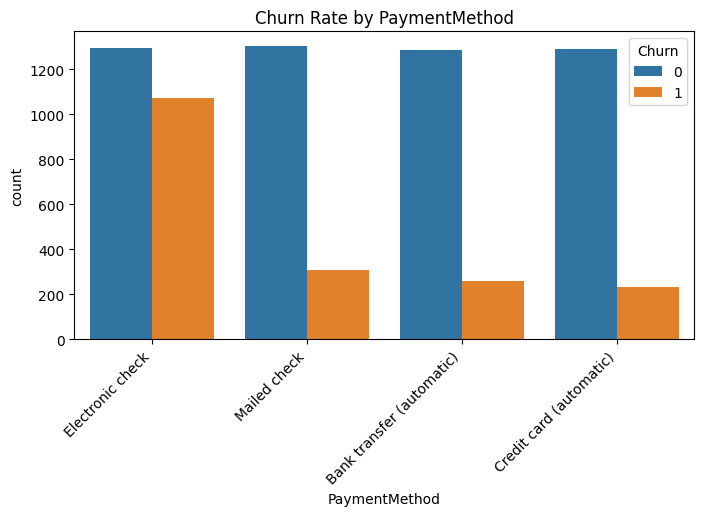

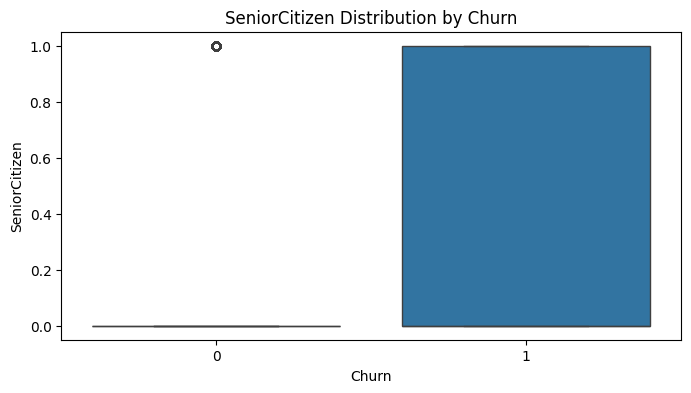

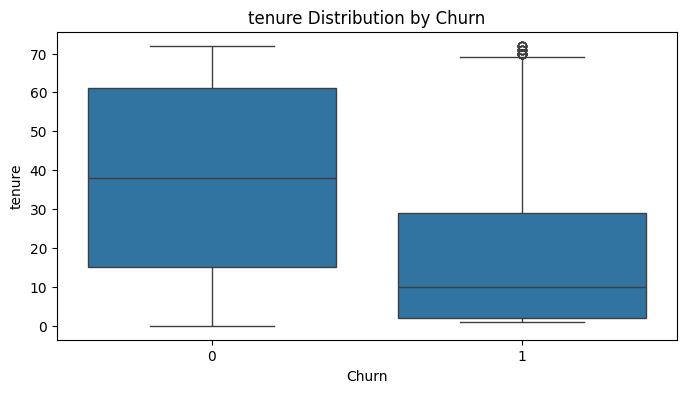

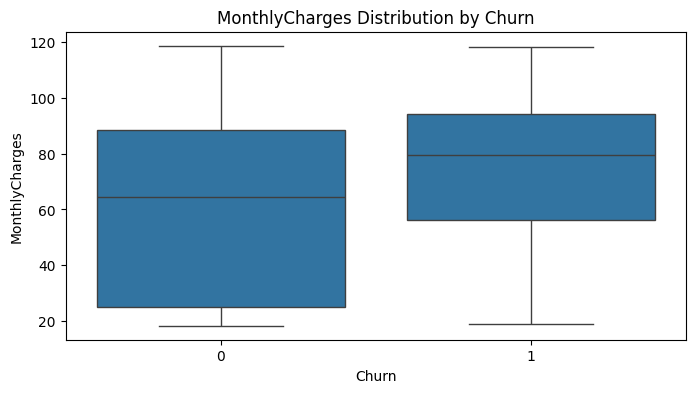

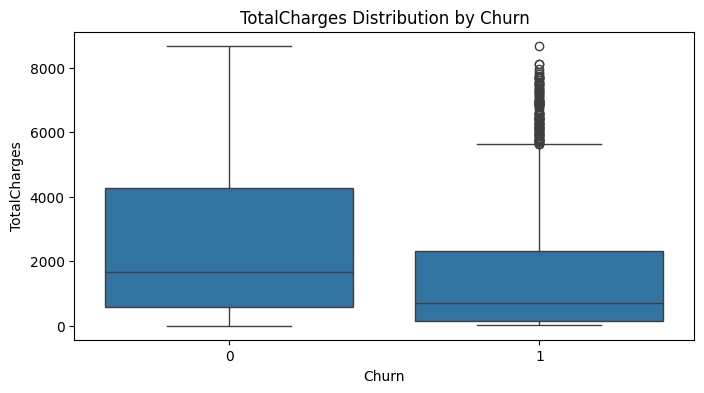

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
if 'Churn' in numerical_features:
    numerical_features = numerical_features.drop('Churn')
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn Rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} Distribution by Churn')
    plt.show()

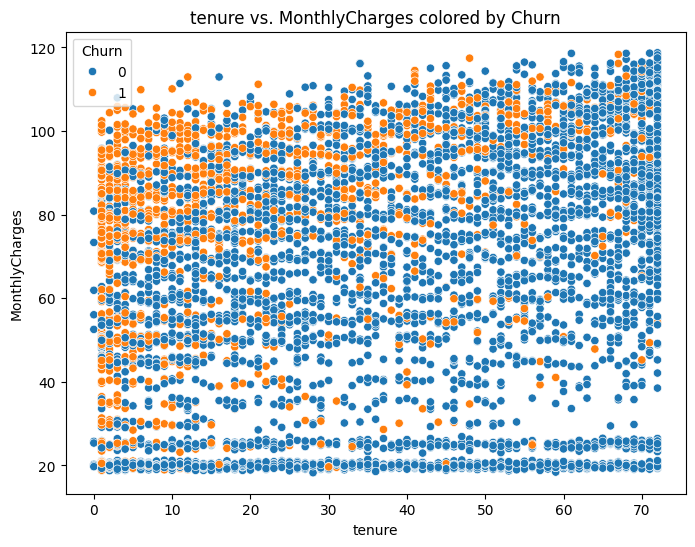

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('tenure vs. MonthlyCharges colored by Churn')
plt.show()

**Data Pre-processing**

In [ ]:
df = df.drop(["customerID"],axis=1)

In [ ]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,NaN
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,NaN
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,0.265370
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,0.441561
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,0.000000
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,0.000000
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,0.000000
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,1.000000


In [ ]:
df["MultipleLines"] = df["MultipleLines"].replace('No phone service', 'No')
df["OnlineSecurity"] = df["OnlineSecurity"].replace('No internet service', 'No')
df["OnlineBackup"] = df["OnlineBackup"].replace('No internet service', 'No')
df["DeviceProtection"] = df["DeviceProtection"].replace('No internet service', 'No')
df["TechSupport"] = df["TechSupport"].replace('No internet service', 'No')
df["StreamingTV"] = df["StreamingTV"].replace('No internet service', 'No')
df["StreamingMovies"] = df["StreamingMovies"].replace('No internet service', 'No')

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
one_hot_encode = ['InternetService', 'Contract']
df = pd.get_dummies(df, columns=one_hot_encode, drop_first=True)

le = LabelEncoder()
for col in cat_cols:
    if col not in one_hot_encode:
        df[col] = le.fit_transform(df[col])

bool_cols = df.select_dtypes('bool').columns
df[bool_cols] =df[bool_cols].astype(int)
df=pd.DataFrame(df)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,...,0,1,2,29.85,29.85,0,0,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,3,56.95,1889.50,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,0,1,3,53.85,108.15,1,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,0,0,42.30,1840.75,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,2,70.70,151.65,1,1,0,0,0


Scaling Each Column

In [ ]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

Splitting data into 80% train and 30% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Model Training & Testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Neural Network': MLPClassifier(max_iter=1000)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name}: {acc:.4f}")

Logistic Regression: 0.7407
Decision Tree: 0.7137
Neural Network: 0.7724


In [ ]:
from sklearn.metrics import classification_report
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Precision and Recall for {name}:")
    print(classification_report(y_test, y_pred))

Precision and Recall for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113

Precision and Recall for Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1552
           1       0.46      0.45      0.46       561

    accuracy                           0.71      2113
   macro avg       0.63      0.63      0.63      2113
weighted avg       0.71      0.71      0.71      2113

Precision and Recall for Neural Network:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1552
           1       0.59      0.47      0.53       561

    accuracy                           0.77      2113
 

**Bar chart showcasing prediction accuracy of all models**

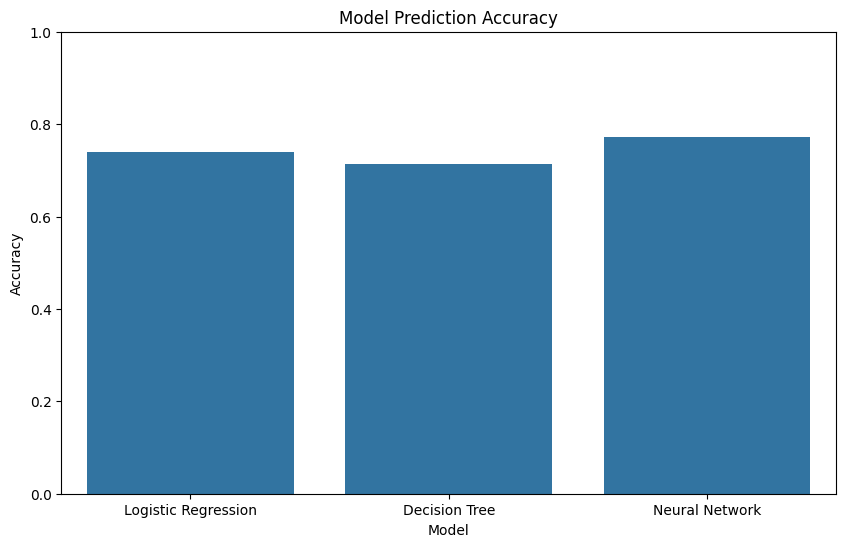

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
accuracy_scores = {}
for name, model in models.items():
    acc = model.score(X_test, y_test)
    accuracy_scores[name] = acc
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Model Prediction Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**Precision, recall comparison of each model.**

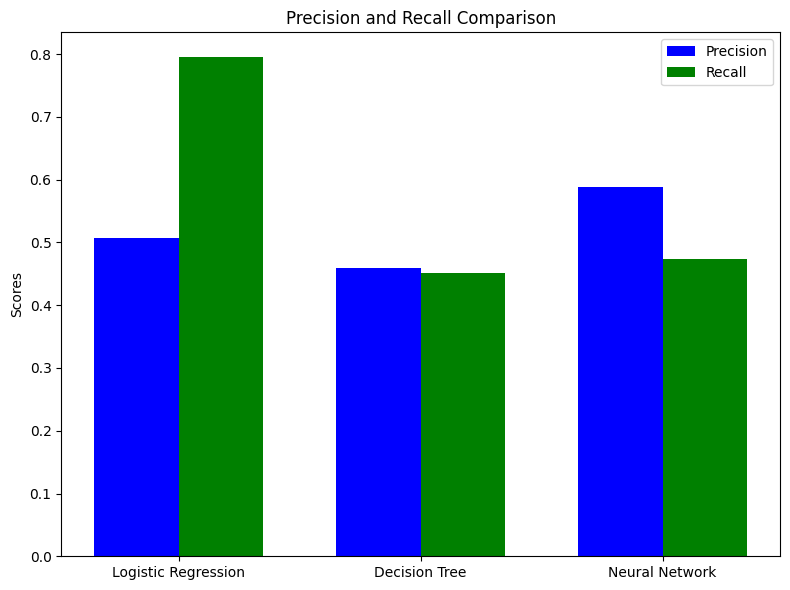

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
model_results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    model_results[name] = {
        'model': model,
        'y_pred': y_pred,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred)
    }


accuracy_scores = {
    model_name: model_results[model_name]['model'].score(X_test, y_test)
    for model_name in models
}

recall_scores = {
    model_name: model_results[model_name]['recall']
    for model_name in models
}

precision_scores = {
    model_name: model_results[model_name]['precision']
    for model_name in models
}
model_names = list(models.keys())
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, list(precision_scores.values()), width, label='Precision', color='blue')
rects2 = ax.bar(x + width/2, list(recall_scores.values()), width, label='Recall', color='green')

ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
fig.tight_layout()
plt.show()

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))

Confusion Matrix for Logistic Regression:
[[1119  433]
 [ 115  446]]
Confusion Matrix for Decision Tree:
[[1255  297]
 [ 308  253]]
Confusion Matrix for Neural Network:
[[1366  186]
 [ 295  266]]


**COnfusion Matrix Graph **

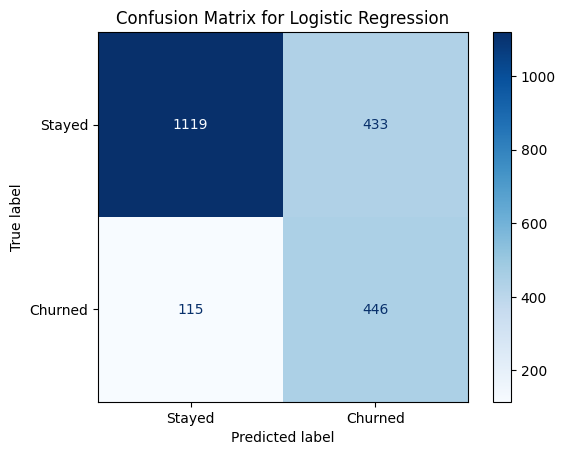

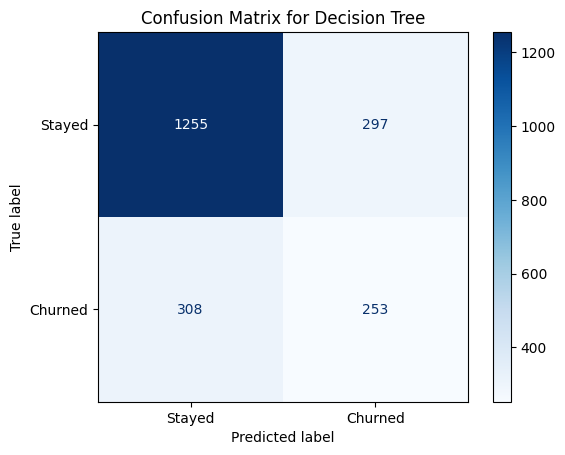

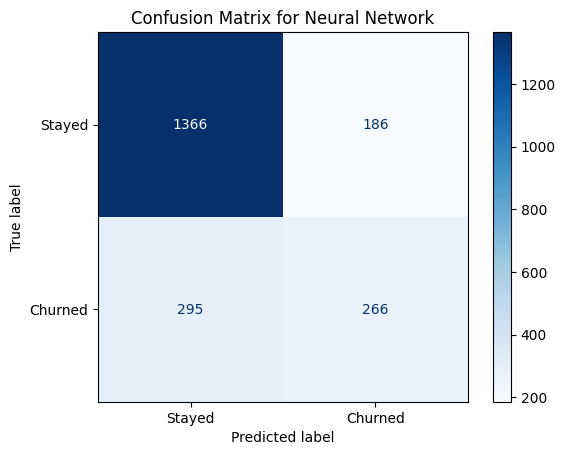

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=['Stayed', 'Churned'])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

**AUC score, ROC curve**

ROC AUC for Logistic Regression: 0.8413
ROC AUC for Decision Tree: 0.6339
ROC AUC for Neural Network: 0.7973


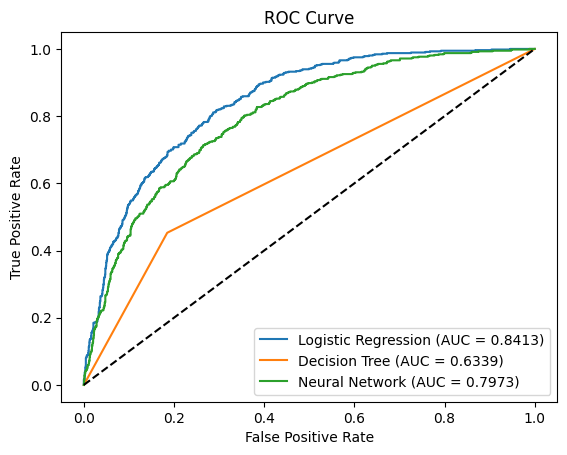

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print(f"ROC AUC for {name}: {auc:.4f}")
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

HeatMap Graph

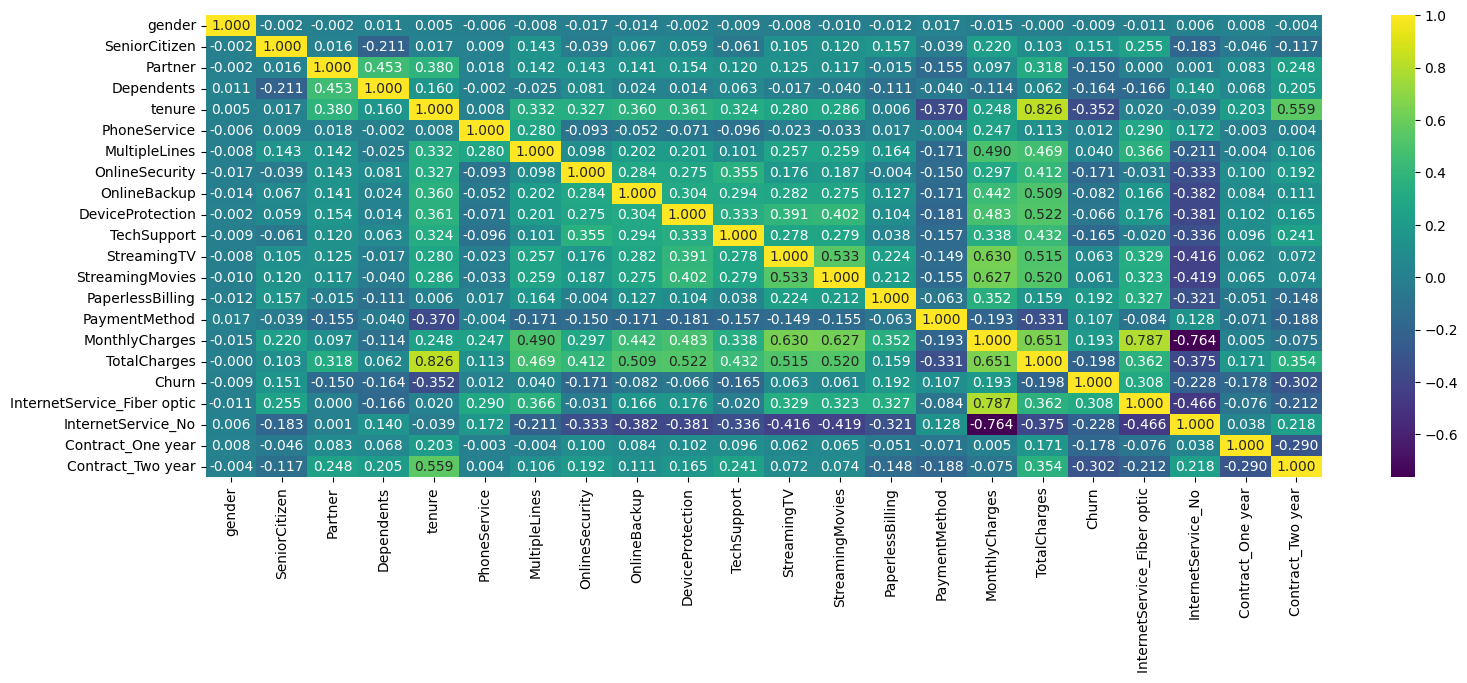

In [ ]:
CM = df.corr()
plt.figure(figsize=(18, 6))
sns.heatmap(CM, annot=True, cmap='viridis', fmt='.3f', linewidths=0.)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()